Notebook exercises based off Prof Gonzalez's DS100 lecture

In [1]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Data 8 Tutoring Week 3

Topics to go over:

- Histograms (Question 2.1 - 2.5)
    - Horizontal and vertical axes 
    - Counts in bins, Unequal bins
    - General principle/ Calculations
    - Bar chart vs. Histograms

- Functions 
    - def statements (Question 3.1)
    - apply (Question 3.2)
    - Functions as values 

- Group
    - Classify by one variable (Question 3.3, 4.1, 4.2)
    - Cross classify by 2 variables (Question 4.3)
    - Pivot tables (Question 3.4, 3.5)
    - Finding distributions with pivoted tables

# Social Security Association

Every year, the SSA records all of the baby names who have social security numbers. The "Count" column describes how many people of each name were born in that year. 
For example, there were 295 female Marys in California in the year 1910. (The first row in the baby_names table)

In [2]:
column_labels = make_array('State', 'Gender', 'Year', 'Name', 'Count')
baby_names = Table().read_table("CA.csv", names = column_labels)
baby_names

State,Gender,Year,Name,Count
CA,F,1910,Mary,295
CA,F,1910,Helen,239
CA,F,1910,Dorothy,220
CA,F,1910,Margaret,163
CA,F,1910,Frances,134
CA,F,1910,Ruth,128
CA,F,1910,Evelyn,126
CA,F,1910,Alice,118
CA,F,1910,Virginia,101
CA,F,1910,Elizabeth,93


## Question 1: What's the data?
How much data do we have?
How many years does this span?
How many people did they record?

In [3]:
num_entries = baby_names.num_rows # SOLUTION
earliest_year = min(baby_names.column('Year')) # SOLUTION
lastest_year = max(baby_names.column('Year')) # SOLUTION
total_people = sum(baby_names.column('Count')) # SOLUTION

print("Number of entries: " + str(num_entries))
print("Time period of data: " + str(earliest_year) + " to " + str(lastest_year))
print("People recorded: " + str(total_people))

Number of entries: 361128
Time period of data: 1910 to 2015
People recorded: 29686407


## Question 2.1: Histograms
First, discuss what each entry (row) of the table represents. What do you think a histogram's bins are?

Next, make a histogram using the numerical data in the column, Years. Use the year_bins as the bins for your histogram. What do you think the histogram is saying? Discuss the x and y axis.

 *** Write your response here ***
 
 SOLUTION:
 
The histogram shows the proportion entries that were in a specific 10 year range. In other words, the histogram is showing us the proportion of names recorded in a specific 10 year range. It is NOT showing us the proportion of people for every 10 years. Remember how the data is collected! One row represents one name, therefore all of the people with that name. One row does NOT represent one person.

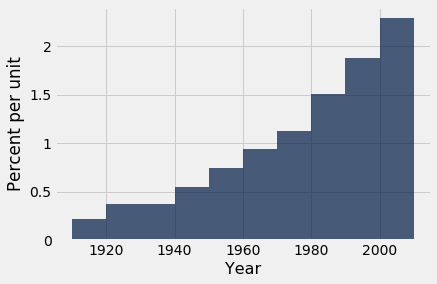

In [5]:
year_bins = np.arange(1910, 2020, 10)

baby_names.select('Year').hist(bins = year_bins) # SOLUTION

## Question 2.2
Why do you see a steady increase from 1920 to 2010?

*** Write your response here ***

SOLUTION

Since the area represents the proportion of names recorded in a specific 10 year range, the increase must mean that there was an increase in the amount of names recorded. A reason for this is that people get more and more creative as time goes on, so there are new names that weren't recorded in the past.

## Question 2.3
Calculate the area in the 1980-1990 bin to get the proportion of names recorded from 1980-1990, and name it area_80_90. If we multiply area_80_90 by the total number of entries, we should get the number of names in that time period. Name this variable num_names_80_90.

Hint: When we mean calculate the area from a histogram, look at and use the actual displayed histogram.

Hint: Remember that the y axis is PERCENT per unit, not PROPORTION per unit!
Check your answer by comparing with the number of names 

In [6]:
area_80_90 = 10 * (1.5 / 100) # SOLUTION
num_names_80_90 = area_80_90 * num_entries # SOLUTION
num_names_80_90

54169.2

## Questions 2.4

Check your answer by comparing num_names_80_90 with the actual number of names recorded from 1980 to 1990. To get the actual number, use the baby_names table.

The number should be close to each other (maybe 5000 off) because the area calculation is not super accurate.

In [7]:
# may take ~10 seconds to load
actual = baby_names.where('Year', are.between_or_equal_to(1980, 1989)).num_rows # SOLUTION
actual

49234

Your calculation shows that the area of a bin is indeed the proportion of entries in that bin! Remember, the area of a histogram is extremely important!

## Question 2.5 

Create a visualization that shows the frequency of values in the column, Counts. Use bins that range from 0 to 1000, with the width 50 for each bin. What is interesting about the visualization? What noticable trend do you see? 

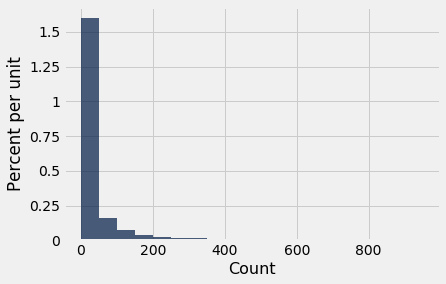

In [72]:
baby_names.select('Count').hist(bins = np.arange(0, 1000, 50)) # SOLUTION

***Write your answer here***

SOLUTION

It looks like most of the area is between 0 and 100, so that means that there are a lot of names in the data set where there were less than 100 people with that name born each year. That means there are a lot of uncommon baby names in the California.

## Question 3.1: Let's define a function

Usually, we can guess the gender of a person with his or her name. One simple way you might guess is that the names of females more often start with vowels, instead of consonants. Let's find out if that's really true!

Define a function, named ends_with_vowel, that takes in a name argument and returns the first letter as a capital letter. For example first_letter("blake") will return "B".

Hint: str.upper() capitalizes the entire string 

Hint 2: str[index] will return the letter at a given index (just like tbl.item(index) )

In [8]:
# Write your function here.

def first_letter(name): # SOLUTION
    return name.upper()[0]

first_letter("blake")

'B'

## Question 3.2
Add a column to baby_names, named First Letter, that extracts the first letter from the Name column. Set the new table to baby_names.

In [9]:
baby_names = baby_names.with_column('First Letter', baby_names.apply(first_letter, "Name")) # SOLUTION
baby_names

State,Gender,Year,Name,Count,First Letter
CA,F,1910,Mary,295,M
CA,F,1910,Helen,239,H
CA,F,1910,Dorothy,220,D
CA,F,1910,Margaret,163,M
CA,F,1910,Frances,134,F
CA,F,1910,Ruth,128,R
CA,F,1910,Evelyn,126,E
CA,F,1910,Alice,118,A
CA,F,1910,Virginia,101,V
CA,F,1910,Elizabeth,93,E


## Question 3.3
For each letter, how many people were born with that letter as their first letter of their name?
Create a table that has a row for every first letter and the number of people whose names start with that letter. The table should be two columns.

Sort it in descending order.

In [10]:
baby_names.select("First Letter", "Count").group('First Letter', sum).sort('Count sum', descending = True) # SOLUTION

First Letter,Count sum
J,4010990
A,2969764
M,2791841
D,2135681
C,2115714
S,2014973
R,2003474
K,1479838
L,1457044
E,1423069


## Question 3.4
Although this tells us how many people were born with a certain first letter, this doesn't show us any relationship with a person's gender.

Make a pivot table, called pivot_by_first_letter, where the rows labels are the first letter of a name and the column labels are the two genders. We want to see the total babies who were female and male for each given name.

In [11]:
pivot_by_first = baby_names.pivot("Gender", "First Letter", values = "Count", collect = sum) # SOLUTION
pivot_by_first

First Letter,F,M
A,1564384,1405380
B,563423,666772
C,1137692,978022
D,801246,1334435
E,714255,708814
F,110414,269636
G,338350,583976
H,264379,215532
I,183832,192408
J,1360403,2650587


The pivot table is somewhat hard to read because the number are so big. Let's fix that by turning the numbers into proportions of males and females for each letter. You don't need to fully understand the next code cell, but make sure you understand the new pivot table before moving on.

In [13]:
# Just run this cell
totals = pivot_by_first.column('F') + pivot_by_first.column('M')
pivot_w_proportions = Table().with_columns('First Letter', pivot_by_first.column('First Letter'),
                                           'F', pivot_by_first.column('F')/totals,
                                           'M', pivot_by_first.column('M')/totals)
pivot_w_proportions.show()

First Letter,F,M
A,0.52677,0.47323
B,0.457995,0.542005
C,0.537734,0.462266
D,0.375171,0.624829
E,0.501912,0.498088
F,0.290525,0.709475
G,0.366844,0.633156
H,0.550892,0.449108
I,0.488603,0.511397
J,0.339169,0.660831


## Question 3.5
We said earlier that perhaps if a name started with a vowel, the person is a female. For which vowels is this true? For which vowels is this false? Is this method a good way to guess the gender?


SOLUTION

True = A, E, Y


False = I, O, U

No, because it's not true for all vowels, and even when it is true, the proportions are very close to each other, almost 50-50.

## Question 4.1: Grouping!
Find the 5 most popular baby names in the US throughout time. Do this by making a table that shows the 5 Names and Counts of all the people who had that name. Name this table top5.

Note: There are a lot of functions that go into this! This is a hard question.

In [14]:
# SOLUTION
top5 = baby_names.select('Name', 'Count').group('Name', sum).sort('Count sum', descending = True).take(np.arange(5))
top5

Name,Count sum
Michael,426503
David,368328
Robert,349743
John,312073
James,276803


## Question 4.2
Let's see if these names correspond with the 5 most popular first letters. Find the 5 most popular first letters in the US throughout time. You should end up with a table that shows the 5 First Letters and Counts of all the people who had that first letter. Name this top5_letter. 

In [16]:
# SOLUTION
top5_letter = baby_names.select('First Letter', 'Count') \
                        .group('First Letter', sum)      \
                        .sort('Count sum', descending = True)\
                        .take(np.arange(5))       
top5_letter

First Letter,Count sum
J,4010990
A,2969764
M,2791841
D,2135681
C,2115714


## Question 4.3
Some names are gender neutral, which means boys and girls have this name. Look at the counts of people by cross-classifying by name AND gender. Name this table by_name_gender. 

In [17]:
by_name_gender = baby_names.select('Name', 'Gender', 'Count').group(['Name', 'Gender'], sum) # SOLUTION
by_name_gender

Name,Gender,Count sum
Aadan,M,18
Aaden,M,546
Aadhav,M,14
Aadhya,F,159
Aadi,M,116
Aadit,M,24
Aaditya,M,61
Aadvik,M,7
Aadya,F,104
Aadyn,M,14


Some common names are thought of as gender neutral. Use the next code cell to look at some commonly known gender neutral names like Leslie, Cameron, Sam, Jordan, Taylor. You can also input whatever name you would like to see!

Are you surprised by the number of females or males with these names? Maybe they aren't as gender neutral as you thought.

In [26]:
by_name_gender.where('Name', are.equal_to(##Insert a name here##)) # enter a string like "Leslie"